# ELVTR Data Science Main Project

## Deliverables

01 Git Repository

Include all project code with a README file containing a high-level project description.

Example README guide: [Make a README](link-to-readme-guide)

Report

* Methodology, approach, and model selection rationale.
* Advantages and limitations of the chosen model.
* Architecture of the final solution.
* Considerations on deployment and scalability of the solution - i.e., how will the model be used in BAU by the business?
* Estimated impact/ROI of the project.

# Data Science in Finance: Lending Club Loan Analysis

## Project Overview

Lending Club has tasked us with preparing a loan application dataset for analysis and predictive modeling. 

The key tasks include data cleaning, exploratory data analysis, and building a predictive model for loan classification. An optional component involves building a real-time scoring application.

**Project Objectives**:
- Clean and preprocess the data.
- Perform exploratory data analysis (EDA) to gain insights.
- Develop a predictive model for loan application approval.
- (Optional) Build a real-time scoring application.

**Dataset Description**:
The dataset consists of loan application records, including various financial metrics and the application status. The data dictionary is provided for understanding the attributes.

**Dataset Path**:
- CSV: `data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv`
- Data Dictionary: `data/1-raw/lending-club-2007-2020Q3/LCDataDictionary.xlsx`

In [32]:
import pandas as pd

In [33]:
pwd

'c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\notebooks'

## Load Data Set

In [ ]:
# Load the data xlsx file as a dataframe
df = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\Loan_status_2007-2020Q3-100k-Full-Data.csv")

# Clean headers in the existing DataFrame 'df'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df.columns.tolist())

df.shape

In [4]:
df.head()

,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000,24000,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000,14000,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [5]:
# Load the data dictionary CSV file as a dataframe
df_data_dict = pd.read_excel("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\LCDataDictionary.xlsx")

# Clean headers in the existing DataFrame 'df'
df_data_dict.columns = df_data_dict.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove trailing whitespaces in all string columns of df_data_dict
df_data_dict = df_data_dict.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Display cleaned headers
print("Cleaned headers:", df_data_dict.columns.tolist())

df_data_dict.shape

Cleaned headers: ['loanstatnew', 'description']


(153, 2)

In [6]:
# Copies the columns and descriptions from the data dictionary into a data frame for future recall.
# Initialize empty lists for LoanStatNew and Description
loanstatnew = []
description = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_data_dict.iterrows():
    loanstatnew.append(row['loanstatnew'])
    description.append(row['description'])

# Apply left-aligned styling to both headers and data cells
styled_df_data_dict = df_data_dict.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_data_dict

,loanstatnew,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


After analysing our data dictionary it is possible to class our columns into figurative categories to better organise our analysis. 

These categories are, for now:

- Credit history, 
- Current Debt and Payment behaviours, 
- Employement, 
- Credit inquiries
- Loan Application information
- Hardship and Settlement Information
- Co-Borrower Information
- Loan Performance

Let's create a table for reference. We'll add these manually so that we can tweak the data within each group as we discover more about our data.

## Display Basic Data Discovery

Let's look at the information within our data frame (df) looking at our initial feature set (pre_hardship_fields).

In [7]:
df.head()

,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,595422,15492,134798709,24000,24000,24000.0,60 months,11.05%,522.42,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,562657,90591,127097355,14000,14000,14000.0,60 months,13.59%,322.79,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


Our data contains 143 columns and 99999 rows of data. It is comprised of numerical (float, int) and categorical data (object)

We've ran into an error (KeyError: "['desc', 'member_id', 'verified_status_joint'] not in index"), for the time being we'll remove the missing fields from df_data_dict. These are most likely naming issues i.e. member_id is most likely id but considering we won't be using this data for now we can remove it and correct later on.

In [8]:
# Extract column headers from df and the first column of df_data_dict
df_columns = set(df.columns)
df_data_dict_columns = set(df_data_dict.iloc[:, 0])  # First column of df_data_dict

# Find columns in df that are missing in df_data_dict
missing_in_data_dict = df_columns - df_data_dict_columns

# Find columns in df_data_dict that are missing in df
missing_in_df = df_data_dict_columns - df_columns

# Output the results
print("Columns in df that are missing in df_data_dict:")
print(missing_in_data_dict)

print("\nColumns in df_data_dict that are missing in df:")
print(missing_in_df)

Columns in df that are missing in df_data_dict:
{'unnamed:_0.1', 'unnamed:_0', 'verification_status_joint'}

Columns in df_data_dict that are missing in df:
{'settlement_status', 'settlement_amount', 'settlement_term', 'verified_status_joint', 'member_id', 'sec_app_mths_since_last_major_derog', 'debt_settlement_flag_date', 'settlement_percentage', 'disbursement_method', nan, 'desc', 'settlement_date'}


Let's filter the values that are missing in df.

In [9]:
# This list was created to run analysis later on. I've opted to select the pre_hardship_fields as my feature selection draft
# Define the groups and fields as specified
groups = {
    "Credit History": [
        'earliest_cr_line', 'fico_range_high', 'fico_range_low', 'last_fico_range_high',
        'last_fico_range_low', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'num_accts_ever_120_pd',
        'num_tl_120dpd_2m', 'pub_rec', 'pub_rec_bankruptcies'
    ],
    "Current Debt and Payment Behaviors": [
        'acc_now_delinq', 'all_util', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
        'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'max_bal_bc', 'mths_since_last_delinq',
        'num_rev_accts', 'num_rev_tl_bal_gt_0', 'percent_bc_gt_75', 'revol_bal', 'revol_util',
        'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit'
    ],
    "Employment": [
        'emp_length', 'emp_title', 'annual_inc', 'annual_inc_joint'
    ],
    "Credit Inquiries": [
        'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'num_tl_op_past_12m'
    ],
    "Loan Application Information": [
        'loan_amnt', 'term', 'int_rate', 'application_type', 'grade', 'sub_grade', 'purpose',
        'issue_d', 'home_ownership', 'zip_code', 'addr_state', 'title', 'desc', 'url'
    ],
    "Hardship and Settlement Information": [
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date',
        'hardship_end_date', 'hardship_amount', 'hardship_length', 'settlement_status', 'settlement_date',
        'settlement_amount', 'settlement_percentage', 'settlement_term'
    ],
    "Co-Borrower Information": [
        'annual_inc_joint', 'dti_joint', 'verified_status_joint', 'revol_bal_joint',
        'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
        'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util'
    ],
    "Loan Performance": [
        'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d'
    ]
}

# Define pre and post hardship fields
pre_hardship_fields = [
    'acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
    'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
    'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 
    'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 
    'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 
    'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 
    'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 
    'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 
    'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 
    'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 
    'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 
    'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 
    'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 
    'open_il_24m', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 
    'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pub_rec', 
    'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'revol_bal', 'revol_util', 
    'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 
    'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 
    'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 
    'verification_status', 'zip_code'
]

post_hardship_fields = [
    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 
    'hardship_start_date', 'hardship_end_date', 'hardship_amount', 'hardship_length', 
    'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
    'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 
    'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 
    'settlement_amount', 'settlement_percentage', 'settlement_term'
]

In [10]:
# Filter pre_hardship_fields to only include values that exist as columns in df
pre_hardship_fields_clean_kn = [field for field in pre_hardship_fields if field in df.columns]

# Display the filtered list
print("Filtered pre_hardship_fields:", pre_hardship_fields_clean_kn)

Filtered pre_hardship_fields: ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats'

In [11]:
df[pre_hardship_fields_clean_kn].head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status,zip_code
0,0,1.0,NY,59.0,48000.0,NaN,Individual,64756.0,NaN,NaN,...,0.0,17928.0,266.950000,266.95,83.29,0.0,183.66,2400.0,Source Verified,115xx
1,0,4.0,LA,67.0,57000.0,NaN,Individual,6182.0,7741.0,40.5,...,7.0,52954.0,25496.160000,25496.16,5829.45,0.0,19666.71,35200.0,Source Verified,708xx
2,0,4.0,FL,NaN,55000.0,NaN,Individual,22733.0,4521.0,54.8,...,NaN,7526.0,5846.672836,5846.67,846.67,0.0,5000.00,11400.0,Not Verified,347xx
3,0,4.0,OH,25.0,43500.0,NaN,Individual,6973.0,43140.0,12.0,...,0.0,20000.0,12000.930000,12000.93,4318.62,0.0,7682.31,54500.0,Not Verified,443xx
4,0,5.0,NE,43.0,48000.0,NaN,Individual,5641.0,17318.0,39.9,...,0.0,38181.0,16605.680000,16605.68,2605.68,0.0,14000.00,43900.0,Source Verified,681xx


In [12]:
df[pre_hardship_fields_clean_kn].describe()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,...,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,100000.000000,98222.000000,70343.000000,1.000000e+05,7.166000e+03,97560.000000,97152.000000,97101.000000,99994.00000,99994.000000,...,70356.000000,98222.000000,70356.000000,9.756200e+04,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.756200e+04
mean,0.003460,4.512166,56.154116,8.002918e+04,1.295764e+05,13757.234143,12779.260859,55.838138,0.00821,0.017651,...,36927.159276,24834.481664,1.517497,4.561308e+04,12559.494957,12544.530188,2479.307829,1.750509,9911.414064,3.639794e+04
std,0.063467,3.173066,20.804306,8.722434e+04,6.799755e+04,16693.219964,18099.386315,28.842058,0.10229,0.144291,...,46072.927224,24487.591805,2.719705,4.693562e+04,10337.364917,10333.630505,2766.019201,13.416653,8669.887647,3.582365e+04
min,0.000000,0.000000,0.000000,0.000000e+00,1.500000e+04,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,2.000000,42.000000,4.716050e+04,8.603411e+04,3128.000000,2000.000000,32.700000,0.00000,0.000000,...,9120.000000,8900.000000,0.000000,1.555025e+04,4744.560000,4732.010000,724.002500,0.000000,3113.807500,1.540000e+04
50%,0.000000,4.000000,57.000000,6.600000e+04,1.150000e+05,7461.500000,6262.500000,57.300000,0.00000,0.000000,...,24095.500000,17500.000000,0.000000,3.408300e+04,9767.650000,9751.745000,1537.715000,0.000000,7415.485000,2.680000e+04
75%,0.000000,6.000000,71.000000,9.500000e+04,1.550000e+05,19105.000000,16184.250000,81.200000,0.00000,0.000000,...,47534.750000,32500.000000,2.000000,6.122675e+04,17567.367503,17540.212500,3175.680000,0.000000,14500.000000,4.570000e+04
max,4.000000,42.000000,175.000000,1.099920e+07,1.110000e+06,471749.000000,393250.000000,175.000000,7.00000,7.000000,...,924163.000000,425150.000000,49.000000,1.029490e+06,66775.524270,66775.520000,31714.370000,819.200000,40000.000000,1.333000e+06


In [13]:
# Initialize list to collect cross-tab data
cross_tab_data = []

# Iterate over each group and each field to determine availability
for group, fields in groups.items():
    for field in fields:
        pre = 'Yes' if field in pre_hardship_fields else 'No'
        post = 'Yes' if field in post_hardship_fields else 'No'
        cross_tab_data.append([group, field, pre, post])

# Create DataFrame for cross-tab
cross_tab_df = pd.DataFrame(cross_tab_data, columns=["Group", "Field", "Pre-Hardship", "Post-Hardship"])

# Apply styling to left-align specific columns and set table header alignment
cross_tab_df_styled = cross_tab_df.style.set_properties(
    subset=['Group', 'Field'],
    **{'text-align': 'left'}
).set_table_styles(
    [{'selector': 'th.col_heading.level0', 'props': [('text-align', 'left')]}]
)

# Display the styled DataFrame
cross_tab_df_styled

,Group,Field,Pre-Hardship,Post-Hardship
0,Credit History,earliest_cr_line,Yes,No
1,Credit History,fico_range_high,Yes,No
2,Credit History,fico_range_low,Yes,No
3,Credit History,last_fico_range_high,No,No
4,Credit History,last_fico_range_low,No,No
5,Credit History,mo_sin_old_il_acct,Yes,No
6,Credit History,mo_sin_old_rev_tl_op,Yes,No
7,Credit History,num_accts_ever_120_pd,Yes,No
8,Credit History,num_tl_120dpd_2m,Yes,No
9,Credit History,pub_rec,Yes,No


Because are scoring is supposed to identify good and bad payers we'll leverage Pre-Hardship feature list for further analysis.

In [14]:
#load the employtment mapping CSV file as a dataframe
df_emp_title = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\emp_title_mapping.csv")

# Clean headers in the existing DataFrame
df_emp_title.columns = df_emp_title.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_emp_title.columns.tolist())

df_emp_title.shape

Cleaned headers: ['job_title', 'category']


(91, 2)

In [15]:
# Initialize empty lists for LoanStatNew and Description
jobtitle = []
job_category = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_emp_title.iterrows():
    jobtitle.append(row['job_title'])
    job_category.append(row['category'])

# Apply left-aligned styling to both headers and data cells
styled_df_emp_title = df_emp_title.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_emp_title

,job_title,category
0,web editor,Content/Media
1,route manager,Operations
2,quality manager,Quality Assurance
3,budget mgr,Finance
4,inspector,Quality Assurance
5,banesco usa,Other
6,mechanical design engineer,Engineering
7,mission assembly,Manufacturing
8,authorization specialist/referral assist,Healthcare
9,registered nurse,Healthcare


In [16]:
# Cross table on 'category' in df_emp_title
category_crosstab = pd.crosstab(index=df_emp_title['category'], columns='count').sort_values(by='count', ascending=False)

# Display the crosstab
category_crosstab

col_0,count
category,
Healthcare,10
Executive,7
IT/Technology,6
Education,6
Other,5
Operations,5
Finance,5
Administrative,5
Technical Support,4


Let's import our libraries and configure any paramaters for charting later on.

In [17]:
# Essential imports for data manipulation, statistics, and visualization
import numpy as np
from scipy import stats
from scipy.stats import normaltest, shapiro, anderson, kstest, skew

# Visualization libraries
import plotly.express as plt  # For interactive plots
import seaborn as sns  # For static plots with themes
import matplotlib.pyplot as plt  # For standard plotting

# Missing data visualization
import missingno as msno

# Machine Learning imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression, LinearRegression  # Logistic and Linear Regression models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor  # Decision Tree Classifier and Regressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor  # Ensemble models
from sklearn.svm import SVC, SVR  # Support Vector Machines (SVC for classification, SVR for regression)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor  # K-Nearest Neighbors models
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifier
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Plot settings for consistent figure size (A4 landscape top half)
FIG_WIDTH = 11.69  # Width
FIG_HEIGHT = 4.14  # Height

# Set the theme for Seaborn plots
sns.set_theme(style='whitegrid')

### Basic Data Overview

Before performing any analysis, we will explore the structure of the dataset to understand the nature of the available data. This includes checking the number of rows and columns, the data types of each feature, and identifying any missing values. Understanding these characteristics is essential for guiding data cleaning and feature engineering steps later in the analysis.

In [18]:
df[pre_hardship_fields].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 102 entries, acc_now_delinq to zip_code
dtypes: float64(70), int64(13), object(19)
memory usage: 77.8+ MB


We can see that our data frame contains 100k rows, 104 columns.

Our Data set contains int, float, and string objects.

Let's check some basic statistics against all int and float data in our data frame.

In [19]:
# Get basic statistics only for int and float columns
df[pre_hardship_fields].describe(include=['int', 'float'])

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,loan_amnt,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_act_il,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,revol_bal,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim
count,100000.000000,98222.000000,70343.000000,1.000000e+05,7.166000e+03,97560.000000,97152.000000,97101.000000,99994.00000,99994.000000,100000.00000,100000.000000,99898.000000,7166.000000,100000.000000,100000.000000,100000.000000,100000.000000,60315.000000,70356.000000,70356.000000,100000.000000,100000.000000,100000.000000,70356.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,47186.000000,24602.000000,14630.000000,68227.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,100000.000000,70356.000000,70356.000000,70356.000000,70356.000000,70356.000000,70356.000000,100000.000000,100000.000000,97558.000000,97133.000000,100000.0,100000.00000,99955.000000,1.000000e+05,99995.000000,97562.000000,9.756200e+04,9.756200e+04,100000.000000,9.822200e+04,70356.000000,98222.000000,70356.000000,9.756200e+04,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.756200e+04
mean,0.003460,4.512166,56.154116,8.002918e+04,1.295764e+05,13757.234143,12779.260859,55.838138,0.00821,0.017651,0.28473,10.706750,19.332252,19.408330,704.639440,700.639200,15328.216250,15313.244829,68.988842,1.075232,1.998707,0.554310,451.708510,15332.373000,5999.964339,125.750589,179.950237,14.462444,8.325342,1.507839,35.034269,44.633322,74.945113,20.323259,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,11.688690,0.928037,0.703906,1.616351,2.839175,1.250881,2.645076,4032.024853,4031.436341,94.356537,40.051512,1.0,0.17770,0.123315,1.689349e+04,0.036772,208.056907,1.459264e+05,1.838475e+05,24.040390,5.279150e+04,36927.159276,24834.481664,1.517497,4.561308e+04,12559.494957,12544.530188,2479.307829,1.750509,9911.414064,3.639794e+04
std,0.063467,3.173066,20.804306,8.722434e+04,6.799755e+04,16693.219964,18099.386315,28.842058,0.10229,0.144291,0.82352,694.930099,17.278045,7.930092,33.802025,33.800996,9467.415275,9470.918891,23.482027,1.496386,2.349284,0.862704,273.022605,9468.189883,5513.920539,54.481015,98.402816,17.989124,9.267053,1.870317,21.915370,21.624549,26.560238,25.242757,32.514952,22.551510,5.971433,22.208072,1.347680,2.380707,3.411094,3.116711,4.694096,7.432067,4.786651,8.035361,3.339014,5.759304,0.021575,0.051073,0.456554,1.844204,5.754573,1.132691,0.941330,1.595079,3.034160,1.491800,2.560293,7465.243079,7464.709160,8.926635,36.068887,0.0,0.55075,0.354398,2.239829e+04,0.365740,1680.478192,1.644569e+05,1.840932e+05,12.055591,5.172936e+04,46072.927224,24487.591805,2.719705,4.693562e+04,10337.364917,10333

We can ignore the id columns, and will drop these as part of our basic data cleaning.

### High level analysis

Scrolling from left to right we can make the following observations:

- The Standard deviation for `annual_inc` is > 87k suggesting large disparity in numbers (we'll check this later on when pulling our distribution plots)
- The average `open_acc` is equal to 11 with a high of up to 86. For UK standards this can be considered extremely high. Worth taking this into account as a feature for our deeper analysis.
- Our delinquency fields show that we have a low average in the `delinq_2yrs` column and an average of 35 months since the last delinquency (`mths_since_last_delinq`) these could be a great indicators. 

Althought there are more lets continue our analysis and feature selection for our machine learning excercise.

## Missing Data

### Checking for Missing Values
To ensure data integrity, we check for missing values in the dataset. The `isnull()` function is used to identify null entries, and the results are sorted by the number of missing values per column. This provides insight into the columns with the most missing data, which could impact our analysis and model performance.


In [20]:
# Check for missing values in each column
missing_values = df[pre_hardship_fields].isnull().sum().sort_values(ascending=False)
print(f"There is a total of: {len(missing_values)} columns that are missing data\n")
# print("\nMissing values in each column:\n") 
# print(missing_values[missing_values > 90000]) # Display only columns with missing values
missing_values

There is a total of: 102 columns that are missing data



dti_joint                         92834
annual_inc_joint                  92834
mths_since_last_record            85370
mths_since_recent_bc_dlq          78057
mths_since_last_major_derog       75398
mths_since_recent_revol_delinq    68342
mths_since_last_delinq            52814
il_util                           39685
mths_since_rcnt_il                31773
all_util                          29657
max_bal_bc                        29644
inq_last_12m                      29644
inq_fi                            29644
total_bal_il                      29644
total_cu_tl                       29644
open_acc_6m                       29644
open_il_12m                       29644
open_il_24m                       29644
open_act_il                       29644
open_rv_24m                       29644
open_rv_12m                       29644
mths_since_recent_inq             12810
emp_title                          8954
emp_length                         6950
num_tl_120dpd_2m                   5512


### Missing Data Strategy
Instead of dropping columns with a high number of missing values, we may want to retain them for our analysis. Following the logic of Abraham Wald's famous airplane and bullet holes approach, it could be beneficial to analyse the data we don't have rather than discard potentially useful columns. 

This is especially relevant for improving loan default predictions as the absence of data in itself is indicative of the possible risk to default on loans.

### Confirming DataFrame Shape

After exploring the missing values, we validate the shape of our dataframe to ensure that the dataset remains unchanged. 

This step helps confirm that we are still working with the full set of features and rows taking into account we've already stripped the first 3 columns.


In [21]:
df[pre_hardship_fields].shape

(100000, 102)

Next, we'll use the `missingno` library to analyze the missing data. This will help us understand how missing data is distributed across the dataset and the correlation between missing values in different columns.

The `missing_values` variable has been defined earlier in our workflow to quantify the total number of missing entries in each column. 

Now, we'll leverage this list to visualize the missing data using  missingno.

Categorical Data Missing Values



<Axes: >

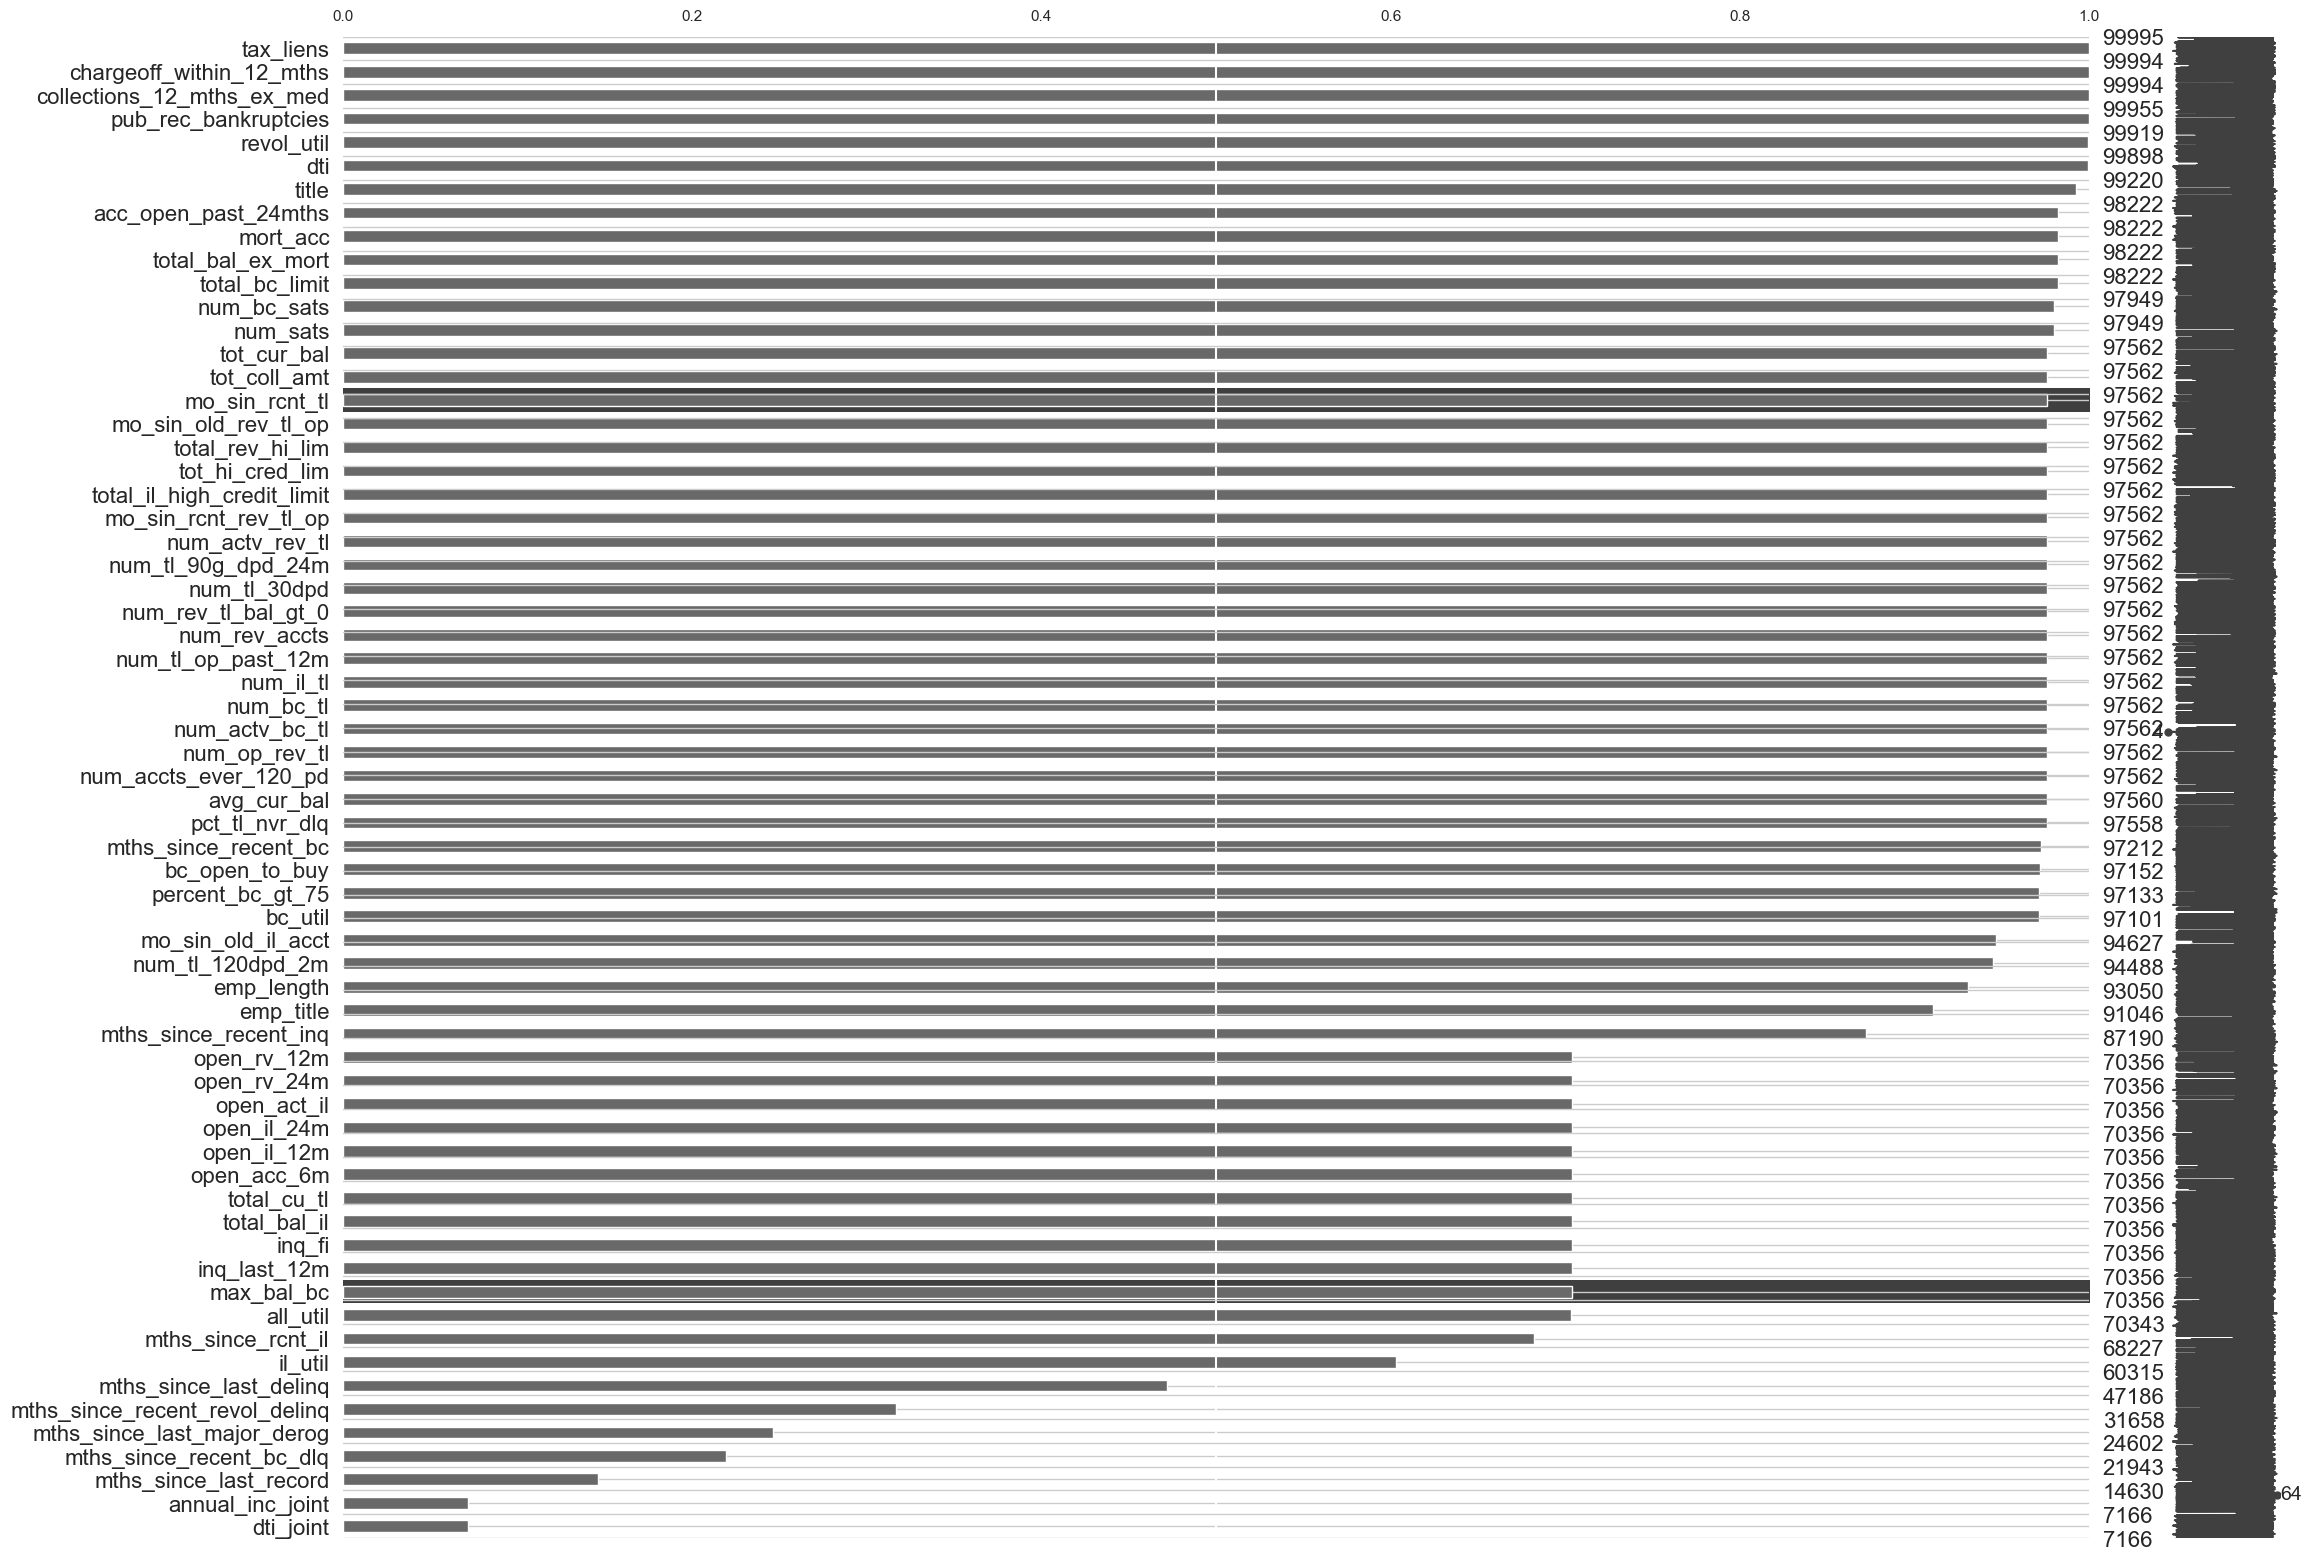

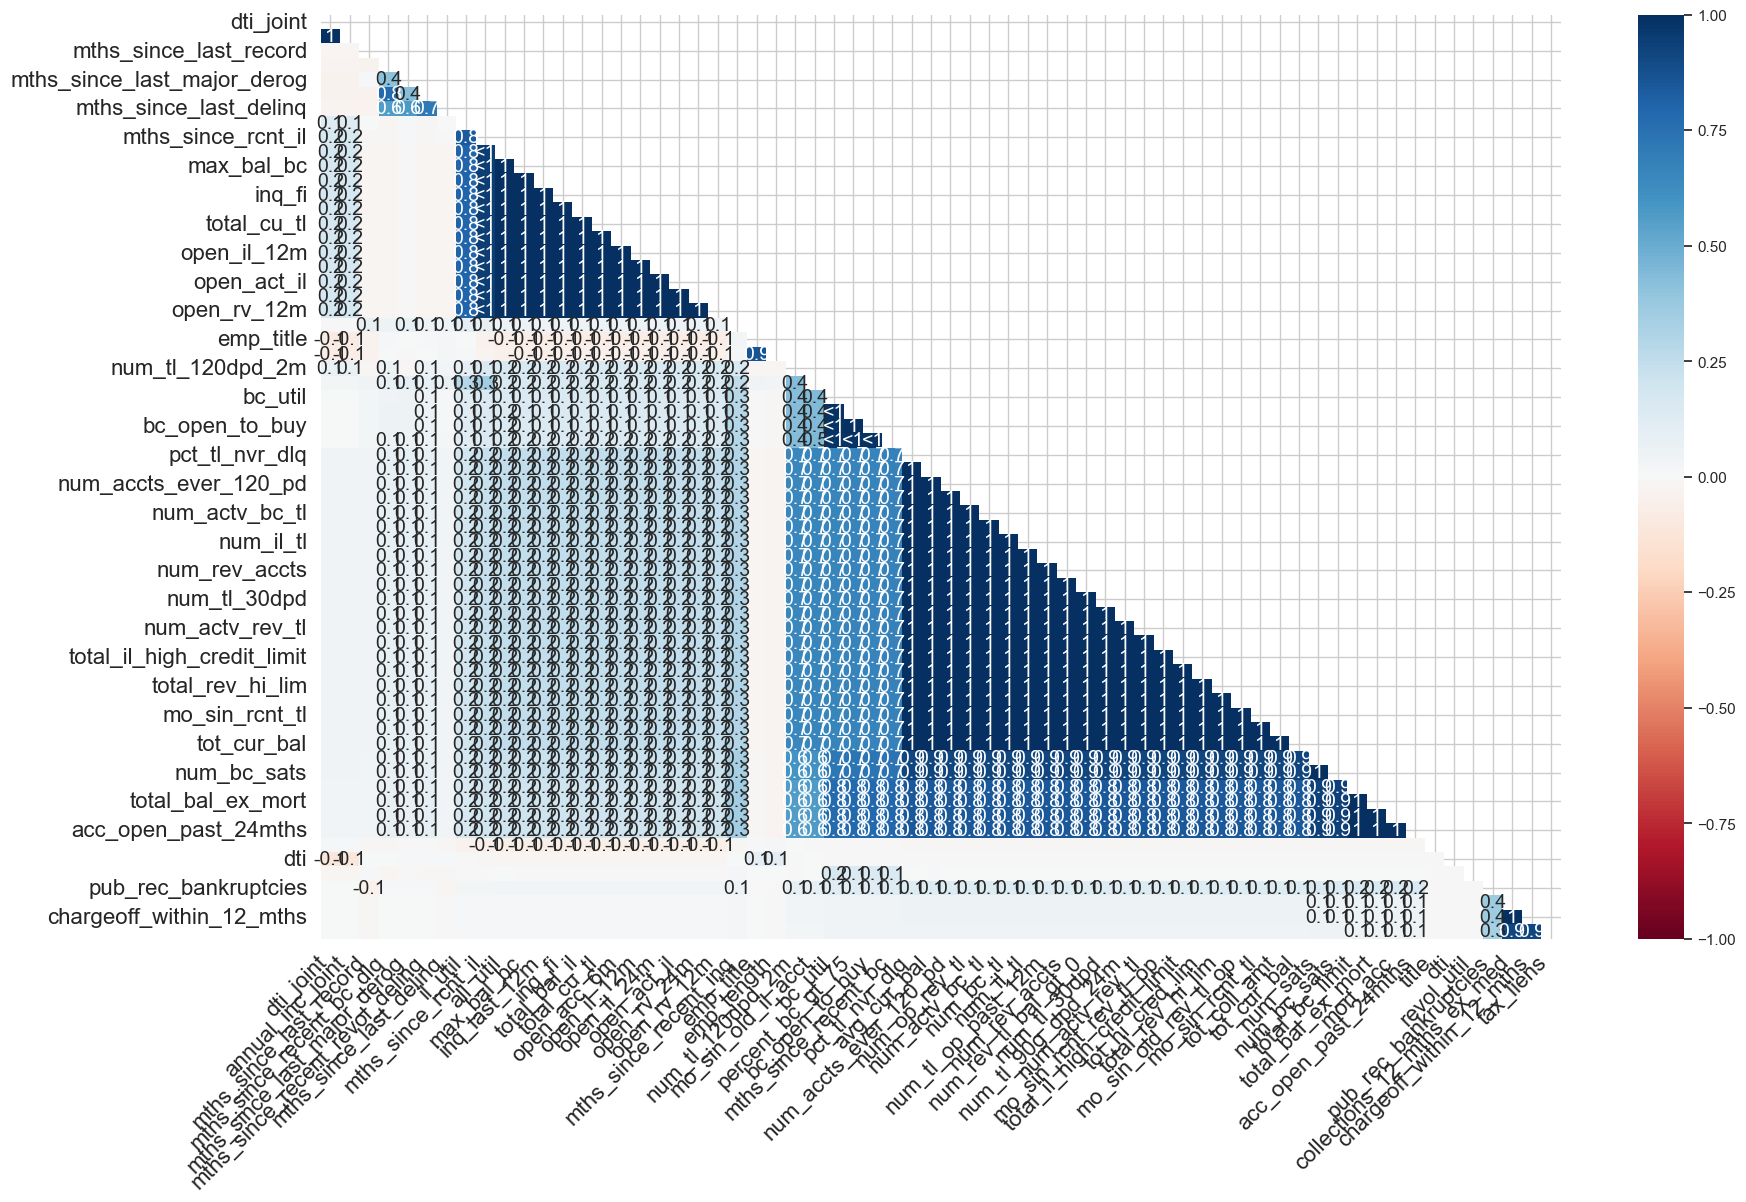

In [22]:
# Filter for columns with missing values greater than 0
missing_values_graph = df[missing_values[missing_values > 0].index]

print("Categorical Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.matrix(missing_values_graph)
msno.bar(missing_values_graph)
msno.heatmap(missing_values_graph)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

### Summary of our missing data findings

#### 1. Missing Data Matrix Plot:
- The matrix plot visualizes the distribution of missing data across the dataset columns.
- Some columns have no missing data, but a few are significantly affected.
- Several columns have a substantial percentage of missing data, some exceeding 75%.
- Key columns with high missing data include:
  - `hardship_*` related fields, `payment_plan_start_date`, `sec_app_*` fields, etc.

#### 2. Missing Data Heatmap:
- The heatmap shows correlations between columns with missing data.
- Higher intensity colors indicate stronger correlations.
- Examples include `emp_title`, `mths_since_last_major_derog`, and `revol_util` showing linked missingness.
- Strong correlations exist between certain groups of columns, suggesting shared patterns in their missing values.
- We can clearly distinguish 4 groups. The three largest relating to `hardship_`, `sec_`, and `Acc` data.

### Creating Missing Value Indicators

Opposed to solomly removing values and using collected data to predict loan defaults I will create indicator variables that flag whether a value was missing for a given feature. 

This allows us to retain missing values while also capturing information about whether a data point was reported or not, which could enhance our analysis.

In [23]:
# Creating a new list by selecting specific groups from the logical mapping we created earlier
selected_groups = ["Credit History", "Employment", "Credit Inquiries"] # created after reading the data dictionary
missing_value_indicator = sum([groups[group] for group in selected_groups], [])

In [24]:
len(missing_value_indicator) + len(pre_hardship_fields)

121

Our draft list of features (`draft_features`) now includes 122 columns identified during the analysis of the missing data, and the basic statistics from `df` along with the information within the data dictionary.

In [25]:
# Selection of initial features based on our previous findings and the descriptions within the data dictionary
draft_features = pre_hardship_fields[:]

Let's expand `df` with new columns to keep a record of the missingness values.

In [26]:
# Empty list to store the new column names
new_missing_columns = []

# Iterating through the list to create missing value indicator columns
for col in missing_value_indicator:
    indicator_col_name = f"{col}_missing_clean_kn"  # Create a new column name for the missing indicator
    df[indicator_col_name] = df[col].isnull().astype(int)  # 1 for missing, 0 for not missing
    
    # Append the new column name to the list
    new_missing_columns.append(indicator_col_name)

# Display the list of new column names
print("New missing indicator columns:", new_missing_columns)
print("Count of New Missing Columns created", len(new_missing_columns))

# Example to verify the new columns
df.head()  # Display the first few rows to verify

New missing indicator columns: ['earliest_cr_line_missing_clean_kn', 'fico_range_high_missing_clean_kn', 'fico_range_low_missing_clean_kn', 'last_fico_range_high_missing_clean_kn', 'last_fico_range_low_missing_clean_kn', 'mo_sin_old_il_acct_missing_clean_kn', 'mo_sin_old_rev_tl_op_missing_clean_kn', 'num_accts_ever_120_pd_missing_clean_kn', 'num_tl_120dpd_2m_missing_clean_kn', 'pub_rec_missing_clean_kn', 'pub_rec_bankruptcies_missing_clean_kn', 'emp_length_missing_clean_kn', 'emp_title_missing_clean_kn', 'annual_inc_missing_clean_kn', 'annual_inc_joint_missing_clean_kn', 'inq_fi_missing_clean_kn', 'inq_last_12m_missing_clean_kn', 'inq_last_6mths_missing_clean_kn', 'num_tl_op_past_12m_missing_clean_kn']
Count of New Missing Columns created 19


,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,earliest_cr_line_missing_clean_kn,fico_range_high_missing_clean_kn,fico_range_low_missing_clean_kn,last_fico_range_high_missing_clean_kn,last_fico_range_low_missing_clean_kn,mo_sin_old_il_acct_missing_clean_kn,mo_sin_old_rev_tl_op_missing_clean_kn,num_accts_ever_120_pd_missing_clean_kn,num_tl_120dpd_2m_missing_clean_kn,pub_rec_missing_clean_kn,pub_rec_bankruptcies_missing_clean_kn,emp_length_missing_clean_kn,emp_title_missing_clean_kn,annual_inc_missing_clean_kn,annual_inc_joint_missing_clean_kn,inq_fi_missing_clean_kn,inq_last_12m_missing_clean_kn,inq_last_6mths_missing_clean_kn,num_tl_op_past_12m_missing_clean_kn
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-20,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1,Dec-04,665,669,0,19.0,110.0,4,1,1988,82.80%,12,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-20,134.93,Jun-20,May-20,669,665,1.0,NaN,1,Individual,NaN,NaN,NaN,0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0,Jan-04,680,684,0,NaN,NaN,10,0,22697,64.50%,24,w,4333.29,4333

In [91]:
# Append the new items to the existing list
pre_hardship_fields.extend(new_missing_columns)

In [ ]:
len(pre_hardship_fields)

Let's check for uniqueness in our feature list.

Here we're looking for variability i.e. which features contain the most variability. The below code will provide us with a list of unique value counts for each feature within our data set, ordered in decending order, and with a % that reflects the uniqueness i.e. if we have 100k unique values (id field) then the % uniqueness will be 100%. This little variability will not add value in our analysis.

In [93]:
def analyze_uniqueness(df):
    """
    Analyzes the number of unique values in all columns within a DataFrame, 
    regardless of their data type, and helps identify suitable candidates for visualization.

    Args:
        df: The Pandas DataFrame to analyze.

    Returns:
        A DataFrame with columns, unique value counts, and percentages.
        Also, displays a bar graph for the unique counts sorted from highest to lowest.
    """
    total_rows = len(df)

    # Calculate unique counts and percentages and store them in a DataFrame
    uniqueness_df = pd.DataFrame({
        "Unique Count": df.nunique(),
        "Unique Percentage": df.nunique() / total_rows * 100
    }).sort_values(by="Unique Count", ascending=False)

    # Print sorted output with unique counts and percentages
    print(uniqueness_df)

    # Create a bar graph to visualize the number of unique values
    plt.figure(figsize=(12, 6))
    plt.bar(uniqueness_df.index, uniqueness_df["Unique Count"])
    plt.xlabel("Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title("Unique Value Counts per Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

    return uniqueness_df

# Example usage with pre-selected columns
# Assuming df and pre_hardship_fields are defined and valid
#try:
#    unique_counts_df = analyze_uniqueness(df[pre_hardship_fields])
#except ValueError as e:
#    print(f"Error: {e}")

In [ ]:
try:
    unique_counts_df = analyze_uniqueness(df[pre_hardship_fields])
except ValueError as e:
    print(f"Error: {e}")

Here we can see columns with 100% and 0% variability i.e. every row is unique or contains the same number. This is typical of unique identifiers and in our case policy codes. We can remove these as they won't be of any use to us for further analysis.

To simplify our data we'll remove 100%, 0%, and anythin less than 5%:

- 100% of values are unique = `id`, `url`
- 0% of values are unique = `policy_code`, `pymnt_plan`

We'll also take this opportunity to remove `unnamed:_0.1`, `unnamed:_0` too.

In [ ]:
# List of columns to drop
columns_to_drop = ['policy_code', 'pymnt_plan']

# Remove specified columns from pre_hardship_fields_clean
pre_hardship_fields = [col for col in pre_hardship_fields if col not in columns_to_drop]

# Display the updated list
len(pre_hardship_fields)

Our feature list has been updated with the new columns. This means that for each column with missing values, a new binary indicator column is created, where `1` represents a missing value and `0` indicates that a value was present. 

This approach ensures that we retain as much information as possible from the original dataset while also capturing the fact that missing values themselves may provide valuable insight. For instance, missing income information could be an indicator of a higher default risk.

## Target Feature Engineering

Let's start by defining our target variable and applying simplify the `loan_status`

In [ ]:
df['loan_status'].value_counts()

In [ ]:
# Define the logical groupings for 'loan_status'
loan_status_groupings = {
    'Fully Paid': 'Paid Loan',
    'Current': 'Active Loan',
    'Charged Off': 'Defaulted Loan',
    'Late (31-120 days)': 'Late Loan',
    'In Grace Period': 'Late Loan',
    'Late (16-30 days)': 'Late Loan',
    'Does not meet the credit policy. Status:Fully Paid': 'Paid Loan',
    'Issued': 'Active Loan',
    'Does not meet the credit policy. Status:Charged Off': 'Defaulted Loan',
    'Default': 'Defaulted Loan'
}

# Apply the grouping to the 'loan_status' column
df['loan_status_grouped_kn'] = df['loan_status'].replace(loan_status_groupings)

pre_hardship_fields.extend(['loan_status_grouped_kn'])

# Verify the groupings
print(df['loan_status_grouped_kn'].value_counts())

In [ ]:
len(pre_hardship_fields)

## Our dependant variable

Our dependant veriable is "loan_status_grouped_kn" further work is to understand how best to predict good and bad loan applicants.

In [ ]:
df['loan_status_grouped_kn'].head()

In [100]:
df_dropped = df[pre_hardship_fields].copy()

Let's check our data frame to see what we're working with. Note our most recent data frame is now df_dropped and no longer df.

In [ ]:
df_dropped.shape

### Exploratory Data Analysis (EDA) on Missing Values

To understand the impact of missing values on our target variable (`loan_status`), we perform an exploratory analysis. 

This compares the distribution of loan status between rows where key variables are missing and where they are not. By doing this, we hope to detect which missing data is associated with loan outcomes. 

This helps us understand how big a influence on the target variable.


In [ ]:
# Select columns that have missing values in df_dropped
missing_cols = df_dropped.columns[df_dropped.isnull().any()]

# Store results for plotting
missing_dict = {}
not_missing_dict = {}

# Function to collect percentages for missing and non-missing data
def missing_value_analysis(column, target_column='loan_status_grouped_kn'):
    missing = df_dropped[df_dropped[column].isnull()][target_column].value_counts(normalize=True) * 100
    not_missing = df_dropped[df_dropped[column].notnull()][target_column].value_counts(normalize=True) * 100
    missing_dict[column] = missing
    not_missing_dict[column] = not_missing

# Apply the function for all columns with missing data
for col in missing_cols:
    missing_value_analysis(col)

# Create DataFrames for heatmaps
missing_df = pd.DataFrame(missing_dict).fillna(0)  # Fill NaN with 0 to ensure proper heatmap display
not_missing_df = pd.DataFrame(not_missing_dict).fillna(0)

# Plotting heatmaps one below the other
fig, ax = plt.subplots(2, 1, figsize=(12, 16), gridspec_kw={'height_ratios': [1, 1]})  # Adjust aspect ratio

# Heatmap for missing data
sns.heatmap(missing_df, annot=False, cmap="Blues", ax=ax[0], cbar_kws={"shrink": .75})
ax[0].set_title('Percentage of Loan Status for Missing Data')
ax[0].tick_params(axis='x', rotation=90, labelsize=10)  # Rotate x-axis labels for readability
ax[0].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

# Heatmap for non-missing data
sns.heatmap(not_missing_df, annot=False, cmap="Greens", ax=ax[1], cbar_kws={"shrink": .75})
ax[1].set_title('Percentage of Loan Status for Non-Missing Data')
ax[1].tick_params(axis='x', rotation=90, labelsize=10)  # Rotate x-axis labels for readability
ax[1].tick_params(axis='y', labelsize=10)  # Adjust y-axis label size

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Summary of Missing and Non-Missing Data by Loan Status

#### 1. Percentage of Missing Data (First Image)
- **Paid Loan**: Shows a high percentage of missing data across numerous columns, particularly towards the end of the list (indicated by darker shades of blue).
- **Active Loan** and **Late Loan**: Generally have less missing data, though some specific columns still contain notable missing values.
- **Defaulted Loan**: Contains fewer missing values compared to `Paid Loan`, but some columns still show missing data.

#### 2. Percentage of Non-Missing Data (Second Image)
- **Paid Loan**: Displays lower percentages of non-missing data across various columns, aligning with the missing data heatmap (darker greens represent more missing data).
- **Active Loan** and **Late Loan**: Feature higher percentages of non-missing data in most columns, shown by lighter green shades, suggesting more complete data.
- **Defaulted Loan**: Generally has a higher percentage of non-missing data than `Paid Loan`, but less than `Active Loan` and `Late Loan`.

### Data Preparation and Cleaning

Perform thorough data cleaning on the provided dataset, including but not limited to the following steps:

* Handling missing values (imputation or removal)
* Converting data types to appropriate formats
* Removing duplicate records
* Detecting and handling outliers
* Encoding categorical variables

In [ ]:
# Cross table of data types in df
dtype_crosstab = df_dropped.dtypes.value_counts().reset_index()
dtype_crosstab.columns = ['Data Type', 'Count']

# Display the cross table
dtype_crosstab

In [104]:
# Correct references to 'completed' to 'complete' in the 'hardship_status' column
df['hardship_status'] = df['hardship_status'].replace('COMPLETED', 'COMPLETE')

### Preliminary Feature Selection

Based on our initial quick analysis of the data and the data dictionary, we'll now work on the shortlisted features for further exploration in our machine learning model. These features were selected based on their relevant at the time of taking out a loan.

In [ ]:
# New feature list
new_features = pre_hardship_fields.copy()

print(len(new_features))

In [ ]:
df_dropped.shape

In [ ]:
# Filter and list columns with 'object' data types from our selected features
# This helps us identify which columns require encoding or conversions before modeling
df_dropped[new_features].select_dtypes(include=['object']).dtypes

In [ ]:
df_dropped[new_features].select_dtypes(include=['object']).head()

## List split

Let's take our list of features we'd like to review for machine learning and split them into 3 seperate lists (boolean, numerical, and categorical) for further analysis.

In this next phase I want to explore the feature selection for multicollinearity and distribution.

In [109]:
def split_data_frame(features_list, df):
    """
    Splits the provided DataFrame into three lists containing Boolean, Numerical, and Categorical column names.
    Converts floats with trailing zeros into integers and replaces NaN values with 0 for integers, 0.00 for floats.

    Parameters:
    features_list (list): List of column names to be checked.
    df (pd.DataFrame): The input DataFrame to split.

    Returns:
    tuple: A tuple containing three lists (boolean_cols, numerical_cols, categorical_cols).
    """
    boolean_cols = []
    numerical_cols = []
    categorical_cols = []

    # Define acceptable boolean values
    acceptable_boolean_values = {0, 1, True, False, 0.0, 1.0}

    for col in features_list:
        # Treat each column explicitly as a Series
        column_series = df[col]

        # Handle cases where columns might be interpreted incorrectly
        if pd.api.types.is_bool_dtype(column_series) or all(column_series.dropna().isin(acceptable_boolean_values)):
            boolean_cols.append(col)
        elif pd.api.types.is_numeric_dtype(column_series):
            # Check for floats with trailing zeros
            if column_series.dtype == 'float64':
                # Check if all float values are equivalent to integers
                if all(column_series.dropna() == column_series.dropna().astype(int)):
                    df[col] = column_series.fillna(0).astype(int)  # Replace NaNs with 0 and convert to int
                else:
                    df[col] = column_series.fillna(0.00)  # Replace NaNs with 0.00 for floats
                numerical_cols.append(col)
            else:
                df[col] = column_series.fillna(0)  # Replace NaNs with 0 for integers
                numerical_cols.append(col)
        else:
            categorical_cols.append(col)
    
    # Print a summary of the count of columns in each list
    print(f"Summary of column counts:")
    print(f"boolean_list contains {len(boolean_cols)} values")
    print(f"numerical_list contains {len(numerical_cols)} values")
    print(f"categorical_list contains {len(categorical_cols)} values")
    print(f"The feature list we'll be working with contains {df_dropped[new_features].shape} rows and columns.")

    return boolean_cols, numerical_cols, categorical_cols

# Instructions:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df_dropped)


In [ ]:
# Check which columns are in df_dropped
missing_columns = [col for col in new_features if col not in df_dropped.columns]

print("Missing columns:", missing_columns)

In [ ]:
# this calls the split_data_frame function above create three lists to capture the sorting outputs in. 
# These will later be used to pull some graphs to evaluate the data and what possible transformations we've missed.
# Our function parameters are list and the latest version of our data frame in this caes new_features and df_dropped accordingly.
boolean_list, numerical_list, categorical_list = split_data_frame(new_features, df_dropped)

In [ ]:
df_dropped[categorical_list].head()

In [113]:
# Replace all NaN values with 0 in df_dropped
df_dropped[categorical_list] = df_dropped[categorical_list].fillna(0)

In [ ]:
df_dropped[numerical_list].head()

In [ ]:
df_dropped[boolean_list].head()

The collowing three sections are the code snippets we'll use to analyse our data (Numerical, Boolean, Categorical)

##### Numerical Processing

In [116]:
def analyze_numeric_columns(numeric_cols, dataframe):
    """
    Analyze and visualize numeric columns in a DataFrame.

    Parameters:
    numeric_cols (list): List of numeric column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in numeric_cols:
        print(f"\nSummary Statistics and Analysis for Numeric Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Ensure the column is converted to numeric
        dataframe.loc[:, column] = pd.to_numeric(dataframe[column], errors='coerce')

        # Drop NaN values to ensure we have numeric data for analysis
        numeric_data = dataframe[column].dropna()

        if numeric_data.empty:
            print(f"No valid numeric data available for column: {column}. Skipping...")
            continue  # Skip the column if there's no valid data

        # Calculate z-scores
        z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

        # Calculate IQR
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on z-scores (z > 3 or z < -3)
        outliers_z = numeric_data[(z_scores > 3) | (z_scores < -3)]

        # Identify outliers based on IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

        # Create a figure for the distribution and box plot
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Distribution plot (histogram)
        sns.histplot(numeric_data, kde=True, bins=10, ax=axs[0])
        axs[0].set_title(f'Distribution of {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')

        # Box plot for outlier detection
        sns.boxplot(x=numeric_data, ax=axs[1])
        axs[1].set_title(f'Box Plot for {column} (Outlier Detection)')
        axs[1].set_xlabel(column)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Summary Statistics
        print(f"\nSummary Statistics for Numeric  '{column}':")
        print(numeric_data.describe())

        # Interquartile Range (IQR)
        print(f"\nInterquartile Range (IQR): {IQR:.4f}")
        print(f"Lower Bound for Outliers (IQR method): {lower_bound:.4f}")
        print(f"Upper Bound for Outliers (IQR method): {upper_bound:.4f}")
        print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")

        # Display outliers based on IQR
        #if not outliers_iqr.empty:
        #    print("\nOutliers detected using the IQR method:")
        #    print(outliers_iqr)
        #else:
        #    print("\nNo outliers detected using the IQR method.")

        # Z-scores
        print("\nZ-score Summary:")
        print(z_scores.describe())

        print(f"\nNumber of Outliers (Z-score method): {len(outliers_z)}")

        # Display outliers based on Z-scores
        #if not outliers_z.empty:
        #    print("\nOutliers detected using the Z-score method:")
        #    print(outliers_z)
        #else:
        #    print("\nNo outliers detected using the Z-score method.")

        # Skewness
        skewness_value = skew(numeric_data)
        print(f"\nSkewness: {skewness_value:.4f}")

        # Normality Tests
        print("\nNormality Tests:")
        # D'Agostino's K^2 Test
        k2_stat, k2_p = normaltest(numeric_data)
        print(f"D'Agostino's K^2 Test: Statistic={k2_stat:.4f}, p-value={k2_p:.4f}")

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(numeric_data)
        print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

        # Anderson-Darling Test
        anderson_result = anderson(numeric_data)
        print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")
        #for i in range(len(anderson_result.critical_values)):
        #    sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        #    if anderson_result.statistic < cv:
        #        result = "Accept"
        #    else:
        #        result = "Reject"
        #    print(f"At {sl}% significance level, critical value: {cv:.4f}, {result} the null hypothesis of normality")

        # Kolmogorov-Smirnov Test against normal distribution
        # ks_stat, ks_p = kstest(numeric_data, 'norm', args=(numeric_data.mean(), numeric_data.std()))
        # print(f"Kolmogorov-Smirnov Test: Statistic={ks_stat:.4f}, p-value={ks_p:.4f}")


##### Boolean Processing

In [117]:
def analyze_boolean_columns(boolean_cols, dataframe):
    """
    Analyze and visualize boolean columns in a DataFrame.

    Parameters:
    boolean_cols (list): List of boolean column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in boolean_cols:
        print(f"\nSummary Statistics and Analysis for Boolean Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"'{column}' is not found in the DataFrame. Skipping...")
            continue

        # Cast the column to boolean in case it contains 1/0 or other non-boolean values
        dataframe[column] = dataframe[column].astype(bool)

        # Prepare boolean counts
        boolean_counts = dataframe[column].value_counts()

        # Create a figure with two subplots
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT)) # Configured at the beginning of the file for image consistancy

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Boolean Distribution for {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Count')

        # Pie chart on the right subplot
        boolean_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            startangle=90
        )
        axs[1].set_title(f'Proportion of True/False for {column}')
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Display summary statistics for boolean data
        print(f"\nSummary for Boolean '{column}':")
        true_count = boolean_counts.get(True, 0)
        false_count = boolean_counts.get(False, 0)
        total_count = true_count + false_count
        true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0

        print(f"Count of True: {true_count}")
        print(f"Count of False: {false_count}")
        print(f"Percentage of True: {true_percentage:.2f}%")


##### Categorical Processing

In [118]:
def analyze_categorical_columns(categorical_cols, dataframe):
    """
    Analyze and visualize categorical columns in a DataFrame.

    Parameters:
    categorical_cols (list): List of categorical column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in categorical_cols:
        print(f"\nSummary Statistics and Analysis for Categorical Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f" '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Prepare category counts and percentages
        category_counts = dataframe[column].value_counts()
        category_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Display bar plot and pie chart
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Frequency Distribution for {column} (Categorical Data)')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

        # Pie chart on the right subplot
        category_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            title=f'Proportion of Categories for {column}',
            startangle=90
        )
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        print(f"\nFrequency Table for '{column}':")
        freq_table = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
        print(freq_table)


Let's start with our analysis of the Categorical features.

In [ ]:
import re

# List to store features that contain any numerical values (even within mixed text)
categorical_list_with_numerical_values = []

# Iterate through each column in categorical_list
for column in categorical_list:
    # Check if the column contains any values with numerical characters
    if df_dropped[column].apply(lambda x: bool(re.search(r'\d', str(x)))).any():
        categorical_list_with_numerical_values.append(column)
        print(f" '{column}' contains numerical values.")

In [ ]:
df_dropped[categorical_list_with_numerical_values].columns

Let's explore our data to avoid creating graphs for rows that contain unique values. To do this we'll run a bar chart.

In [121]:
def analyze_categorical_uniqueness(df, columns):
    """
    Analyzes the number of unique values in categorical columns and 
    helps identify suitable candidates for visualization.

    Args:
        df: The Pandas DataFrame.
        columns: A list of column names to analyze.

    Returns:
        A dictionary where keys are column names and values are 
        the number of unique values in each column. Also, 
        prints a summary to assist visualizing the results via bar graphs.
    """
    uniqueness_counts = {}
    for col in columns:
        if not pd.api.types.is_object_dtype(df[col]):  # checks for object type; adjust if needed
            continue  # Skip analysis for non-categorical columns
        
        unique_count = df[col].nunique()  # use nunique for direct count of unique values
        uniqueness_counts[col] = unique_count

    # Sort the dictionary by unique counts in descending order
    sorted_uniqueness_counts = dict(sorted(uniqueness_counts.items(), key=lambda item: item[1], reverse=True))

    # Print sorted output with unique counts
    print("Sorted Unique Value Counts:")
    for col, unique_count in sorted_uniqueness_counts.items():
        print(f"Number of unique values in '{col}': {unique_count}")

    # Create a bar graph to visualize the number of unique values, sorted from high to low
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_uniqueness_counts.keys(), sorted_uniqueness_counts.values())
    plt.xlabel("Categorical Columns", fontsize=14)
    plt.ylabel("Number of Unique Values", fontsize=14)
    plt.title("Unique Value Counts per Categorical Column (Sorted)", fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

    return sorted_uniqueness_counts

# Example usage:

#categorical_uniqueness = analyze_categorical_uniqueness(df_dropped, categorical_list_with_numerical_values)
#columns_for_visualization = [col for col, count in categorical_uniqueness.items() if count <= 15] # Example: Use only below or equal to 10
#print(f"\nSuggested columns for visualization (<= 15 unique values): {columns_for_visualization}")


In [ ]:
categorical_uniqueness = analyze_categorical_uniqueness(df, categorical_list_with_numerical_values)

columns_for_visualization = [col for col, count in categorical_uniqueness.items() if count <= 10] # Example: Use only below or equal to 10

Straight away we can see `int_rate` (584),`emp_title` (40049), `issue_d` (159),`title` (3454), `revol_util` (1088), `last_pymnt_d` (147), `earliest_cr_line` (667), `sec_app_earliest_cr_line` (506), `last_credit_pull` (137). `zip_code` (878) stand out, we'll remove these as graphically representing these won't produce any meaningful insight. However, we'll see if we can reduce them into logical groupings later on.

In [ ]:
exclude_list = ['int_rate', 'zip_code', 'emp_title', 'issue_d', 'title', 'revol_util', 'last_pymnt_d', 'earliest_cr_line', 'sec_app_earliest_cr_line', 'last_credit_pull_d']

# Filter the categorical columns to exclude specified ones
filtered_categorical_columns = [col for col in categorical_list_with_numerical_values if col not in exclude_list]

# Analyze the filtered categorical columns
analyze_categorical_columns(filtered_categorical_columns, df_dropped)

### Handling Object and Float Features

We have identified the following columns that require conversion or encoding:

#### Actions Post-Analysis

##### Convert String to Integer
- **term**: Extract numerical part and convert to integer (keep `36` and `60`).
- **emp_length**: Extract numerical years and convert to integer.

##### Convert String to Float
- **int_rate**: Convert to float after removing any non-numeric characters.
- **revol_util**: Convert to float after removing the "%" symbol.

##### Encode Categorical Values
- **sub_grade**: Use as is or encode if necessary; consider dropping **grade** if redundant.
- **loan_status**: Group or encode based on loan status levels.
- **hardship_loan_status**: Analyze and group similar hardship statuses if logical.

##### Convert to Date/Time Format
- **issue_d**: Convert to date/time for chronological analysis.
- **earliest_cr_line**: Convert to date/time to track the earliest credit history.
- **last_pymnt_d**: Convert to date/time; create separate year and month columns.
- **next_pymnt_d**: Convert to date/time; add year and month columns.
- **last_credit_pull_d**: Convert to date/time for recent credit activity insights.
- **sec_app_earliest_cr_line**: Convert to date/time for secondary applicants’ credit history.
- **hardship_start_date**: Convert to date/time; add year and month columns.
- **hardship_end_date**: Convert to date/time; add year and month columns.
- **payment_plan_start_date**: Convert to date/time; add year and month columns.

##### Remove Non-Analytical or Irrelevant Columns
- **emp_title**: Not relevant for numerical analysis; remove.
- **url**: Non-analytical; remove as it doesn’t contribute to analysis.

##### Evaluate for Categorical Consistency
- **zip_code**: Analyze the first few digits if relevant to extract location-based insights.


#### Convert string to integer

In [ ]:
import re

# Define the columns that need to be converted from string to integer
string_columns_to_convert_int = ['term', 'emp_length']  # features to replace with int values

# Convert each specified column to an integer in a new column
for column in string_columns_to_convert_int:
    # Extract numerical part and convert to integer
    df_dropped[f"{column}_kn"] = df_dropped[column].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) else None)

# Drop the original string columns
#df_dropped.drop(columns=string_columns_to_convert_int, inplace=True)

In [ ]:
df_dropped[['term_kn','emp_length_kn']].head()

#### Convert string to float

In [ ]:
import re

# Define the columns that need to be converted from string to float
string_columns_to_convert_float = ['int_rate', 'revol_util']  # features to replace with float values

# Convert each specified column to a float in a new column as percentage (e.g., 80% becomes 0.80)
for column in string_columns_to_convert_float:
    # Extract numerical part, convert to float, and divide by 100
    df_dropped[f"{column}_kn"] = df_dropped[column].apply(
        lambda x: float(re.search(r'\d+', str(x)).group()) / 100 if pd.notnull(x) else None
    )
    
# Drop the original string columns
#df_dropped.drop(columns=string_columns_to_convert_float, inplace=True)

In [ ]:
df_dropped['int_rate_kn'].head()

#### Convert date time

In [ ]:
# List of date columns to convert
date_columns = ['issue_d', 'earliest_cr_line']

# Convert the columns to datetime format
for col in date_columns:
    # Convert to datetime using the format '%b-%Y', with errors coerced to NaT
    df_dropped[col] = pd.to_datetime(df_dropped[col], format='%b-%Y', errors='coerce')

# Extracting date features for each date column
for col in date_columns:
    # Define new column names for year and month
    year_col = f'{col}_year_kn'
    month_col = f'{col}_month_kn'
       
    # Extract year and month, convert to integer with support for NaNs
    df_dropped[year_col] = df_dropped[col].dt.year.astype('Int64').fillna(0)  # Extract year
    df_dropped[month_col] = df_dropped[col].dt.month.astype('Int64').fillna(0)  # Extract month
    
    # Add the new column names to the existing 'new_features' list
    new_features.extend([year_col, month_col])
    
    # Remove the original date columns
    #if col in new_features:
    #    new_features.remove(col)

In [ ]:
df_dropped.head()

#### Remove Non Analytical or Irrelevent columns

I'm tempted to leave these in as it could be a good indicator of good or bad payment trends but won't have the time to do it for now we'll remove them.

In [130]:
# Define the list of columns to remove
columns_to_remove = ['zip_code', 'emp_title']  # Replace as needed with column names

# Remove the specified columns from df_dropped
df_dropped = df_dropped.drop(columns=columns_to_remove)

#### Creating logical groups 

- **hardship_reason**: Analyse and group to simplify analysis (import from df)

In [ ]:
# Define the logical groupings for 'hardship_reason'
hardship_reason_groupings = {
    'INCOMECURT': 'Income Loss',
    'UNEMPLOYED': 'Income Loss',
    'UNEMPLOYMENT': 'Income Loss',
    'INCOME_CURTAILMENT': 'Income Loss',
    'REDCDHOURS': 'Income Loss',
    'REDUCED_HOURS': 'Income Loss',
    'FURLOUGH': 'Income Loss',
    'MEDICAL': 'Health Issues',
    'DISABILITY': 'Health Issues',
    'NATURAL_DISASTER': 'External Events',
    'NATDISAST': 'External Events',
    'FINANCIAL': 'Financial Strain',
    'EXCESSIVE_OBLIGATIONS': 'Financial Strain',
    'EXCESSOBLI': 'Financial Strain',
    'DIVORCE': 'Family Circumstances',
    'FAMILY_DEATH': 'Family Circumstances',
    'DEATH': 'Family Circumstances'
}

# Apply the grouping to the 'hardship_reason' column
df_dropped['hardship_reason_grouped_kn'] = df['hardship_reason'].replace(hardship_reason_groupings) # adding this back into our data set

# Verify the groupings
print(df_dropped['hardship_reason_grouped_kn'].value_counts())


Let's check the shape of our data to ensure the changes have been made.

In [ ]:
df_dropped['home_ownership'].value_counts()

In [ ]:
# Replace 'Any', 'Other', and 'none' with a unified value 'Other'
df_dropped['home_ownership_kn'] = df_dropped['home_ownership'].replace(['Any', 'Other', 'none'], 'Other')

# Display the updated DataFrame to verify
df_dropped['home_ownership_kn'].head()

#### Encode Categorical features

In [ ]:
# Define the columns that need to convert 'Y' to 1 and 'N' to 0
columns_to_convert_binary = ['application_type','initial_list_status','verification_status', 'home_ownership_kn']  # Add any additional columns here

# Initialize an empty list for new feature names
new_features = []

# Loop through each specified column
for column in columns_to_convert_binary:
    # Create a new column with '_kn' suffix and map 'Y' to 1 and 'N' to 0
    df_dropped[f"{column}_kn"] = df_dropped[column].map({'Y': 1, 'N': 0})

    # Append the new column name to new_features if not already present
    new_col_name = f"{column}_kn"
    if new_col_name not in new_features:
        new_features.append(new_col_name)

In [135]:
# Define a list of columns to be removed
columns_to_remove = [
    'term', 'emp_length', 'int_rate', 'revol_util', 'application_type', 
    'initial_list_status', 'verification_status', 'issue_d', 'earliest_cr_line'
]

# Remove the specified columns from df_dropped
df_dropped = df_dropped.drop(columns=columns_to_remove)

In [ ]:
df_dropped.shape

## EDA

Let's run our list function again on the udpated data frame and scroll through to update our feature list.

In [ ]:
analyze_boolean_columns(boolean_list, df_dropped)

After reviewing our output I've decided to drop the following values as their representation within the data set is not meaningful enought to be any statistical significance.

In [54]:
# Define the list of columns to drop from original list
columns_to_drop = [
    'Acc_open_past_24mths_missing_clean_kn',
    'Revol_util_missing_clean_kn',
    'Last_pymnt_d_missing_clean_kn',
    'hardship_flag_missing_clean_kn'
]

# Drop the specified columns from the list
boolean_list_updated = [col for col in boolean_list if col not in columns_to_drop]

In [ ]:
df_dropped['loan_status'].value_counts()

In [56]:
def analyze_numeric_columns(numeric_cols, dataframe):
    """
    Analyze and visualize numeric columns in a DataFrame.

    Parameters:
    numeric_cols (list): List of numeric column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in numeric_cols:
        print(f"\nSummary Statistics and Analysis for Numeric Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"Column '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Ensure the column is converted to numeric
        dataframe.loc[:, column] = pd.to_numeric(dataframe[column], errors='coerce')

        # Drop NaN values to ensure we have numeric data for analysis
        numeric_data = dataframe[column].dropna()

        if numeric_data.empty:
            print(f"No valid numeric data available for column: {column}. Skipping...")
            continue  # Skip the column if there's no valid data

        # Calculate z-scores
        z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

        # Calculate IQR
        Q1 = numeric_data.quantile(0.25)
        Q3 = numeric_data.quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers based on z-scores (z > 3 or z < -3)
        outliers_z = numeric_data[(z_scores > 3) | (z_scores < -3)]

        # Identify outliers based on IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = numeric_data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

        # Create a figure for the distribution and box plot
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Distribution plot (histogram)
        sns.histplot(numeric_data, kde=True, bins=10, ax=axs[0])
        axs[0].set_title(f'Distribution of {column}')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')

        # Box plot for outlier detection
        sns.boxplot(x=numeric_data, ax=axs[1])
        axs[1].set_title(f'Box Plot for {column} (Outlier Detection)')
        axs[1].set_xlabel(column)

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        # Summary Statistics
        print(f"\nSummary Statistics for Numeric Column '{column}':")
        print(numeric_data.describe())

        # Interquartile Range (IQR)
        print(f"\nInterquartile Range (IQR): {IQR:.4f}")
        print(f"Lower Bound for Outliers (IQR method): {lower_bound:.4f}")
        print(f"Upper Bound for Outliers (IQR method): {upper_bound:.4f}")
        print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")

        # Z-scores
        print("\nZ-score Summary:")
        print(z_scores.describe())

        print(f"\nNumber of Outliers (Z-score method): {len(outliers_z)}")

        # Skewness
        skewness_value = skew(numeric_data)
        print(f"\nSkewness: {skewness_value:.4f}")

        # Normality Tests
        print("\nNormality Tests:")
        # D'Agostino's K^2 Test
        k2_stat, k2_p = normaltest(numeric_data)
        print(f"D'Agostino's K^2 Test: Statistic={k2_stat:.4f}, p-value={k2_p:.4f}")

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(numeric_data)
        print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

        # Anderson-Darling Test
        anderson_result = anderson(numeric_data)
        print(f"Anderson-Darling Test: Statistic={anderson_result.statistic:.4f}")

In [ ]:
analyze_numeric_columns(numerical_list, df_dropped)

lets check the null values within our categorical data

In [ ]:
df_dropped[numerical_list].isnull().sum()

In [59]:
# List of columns to drop from original list
columns_to_drop = [
    'revol_util',
    'emp_title',
    'addr_state',
    'next_pymnt_d',
    'sec_app_earliest_cr_line'
]

# Drop the specified columns from the list
categorical_list_updated = [col for col in categorical_list if col not in columns_to_drop]

Let's look at our categorical data

In [ ]:
df_dropped[categorical_list_updated].head(10)

In [61]:
def analyze_categorical_columns(categorical_cols, dataframe):
    """
    Analyze and visualize categorical columns in a DataFrame.

    Parameters:
    categorical_cols (list): List of categorical column names to analyze.
    dataframe (pd.DataFrame): The DataFrame containing the data.
    """
    for column in categorical_cols:
        print(f"\nSummary Statistics and Analysis for Categorical Column: {column}")

        # Check if the column exists in the DataFrame
        if column not in dataframe.columns:
            print(f"Column '{column}' is not found in the DataFrame. Skipping...")
            continue

        # Prepare category counts and percentages
        category_counts = dataframe[column].value_counts()
        category_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Display bar plot and pie chart
        fig, axs = plt.subplots(1, 2, figsize=(FIG_WIDTH, FIG_HEIGHT))

        # Bar plot using 'x' parameter
        sns.countplot(
            x=column,
            data=dataframe,
            ax=axs[0]
        )
        axs[0].set_title(f'Frequency Distribution for {column} (Categorical Data)')
        axs[0].set_xlabel(column)
        axs[0].set_ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

        # Pie chart on the right subplot
        category_counts.plot.pie(
            autopct='%1.1f%%',
            ax=axs[1],
            title=f'Proportion of Categories for {column}',
            startangle=90
        )
        axs[1].set_ylabel('')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

        print(f"\nFrequency Table for '{column}':")
        freq_table = pd.DataFrame({'Count': category_counts, 'Percentage': category_percentages})
        print(freq_table)


In [ ]:
analyze_categorical_columns(categorical_list_updated, df_dropped)

Let's check some of the categorical points with our target variable

In [ ]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_purpose = pd.crosstab(df_dropped['loan_status'], df_dropped['purpose'])

# Display the result
comparison_loan_status_purpose

In [ ]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_ver_status = pd.crosstab(df_dropped['loan_status'], df_dropped['verification_status'])

# Display the result
comparison_loan_status_ver_status

This is an interesting view, as the the Not Verified, and Source Verified represent both roughly 15-20% of the charged off loans for each status but Verified accounts for roughly 23% of the total. I was expecting a lot of the Charged Off in the Not Verified `verification_status`

In [ ]:
# Create a cross-tabulation of purpose and loan_status
comparison_loan_status_addr_state = pd.crosstab(df_dropped['loan_status'], df_dropped['addr_state'])

# Display the result
comparison_loan_status_addr_state

In [ ]:
# Group data by 'loan_status' and 'addr_state' and count occurrences
grouped_data = df_dropped.groupby(['addr_state', 'loan_status']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.title('Loan Status by Address State')
plt.xlabel('Address State')
plt.ylabel('Count of Loan Status')
plt.legend(title='Loan Status')

# Display the plot
plt.show()

Let's keep `addr_state` in our feature set.

An additional feature could be the ratio of Charged Off by Fully Paid by state. We'll leave this for now.

Looking at the data let's make some further transformations.

In [67]:
# Replace 'ANY', 'OTHER', and 'NONE' with 'UNKNOWN' in the 'home_ownership' column
df_dropped['home_ownership'] = df_dropped['home_ownership'].replace(['ANY', 'OTHER', 'NONE'], 'UNKNOWN')

## Post EDA Analysis data transformation


In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def transform_features(dataframe, bool_features, num_features, cat_features, prefix_suffix='_clean_kn'):
    """
    Transforms features in the dataframe based on their data type and specified feature lists.

    Parameters:
    ----------
    dataframe : pd.DataFrame
        The DataFrame containing the data to be transformed.
    bool_features : list
        A list of column names representing boolean features.
    num_features : list
        A list of column names representing numerical features.
    cat_features : list
        A list of column names representing categorical features.
    prefix_suffix : str
        The suffix to append to the prefix of each column during one-hot encoding.

    Returns:
    --------
    df_transformed : pd.DataFrame
        The DataFrame with transformed features.
    """
    # Copy the original DataFrame to avoid modifying it
    df_transformed = dataframe.copy()
    
    # Process boolean features
    for feature in bool_features:
        if feature in df_transformed.columns:
            print(f"Processing boolean feature: {feature}")
            # Ensure the feature is boolean or convert to boolean
            df_transformed[feature] = df_transformed[feature].astype(bool)
            
            # Convert boolean to integer (0 and 1)
            df_transformed[feature] = df_transformed[feature].astype(int)
            
            # Scale the feature using StandardScaler
            scaler = StandardScaler()
            df_transformed[feature] = scaler.fit_transform(df_transformed[[feature]])
        else:
            print(f"Boolean feature '{feature}' not found in DataFrame. Skipping...")

    # Process numerical features
    for feature in num_features:
        if feature in df_transformed.columns:
            print(f"Processing numerical feature: {feature}")
            # Handle missing values by imputing with 0
            df_transformed[feature] = df_transformed[feature].fillna(0)
            
            # Check for skewness and apply log transformation if necessary
            skewness = df_transformed[feature].skew()
            if skewness > 1 or skewness < -1:
                # Apply log transformation to reduce skewness
                feature_min = df_transformed[feature].min()
                if feature_min <= 0:
                    df_transformed[feature] = np.log1p(df_transformed[feature] - feature_min + 1)
                else:
                    df_transformed[feature] = np.log1p(df_transformed[feature])
            
            # Scale the feature using StandardScaler
            scaler = StandardScaler()
            df_transformed[feature] = scaler.fit_transform(df_transformed[[feature]])
        else:
            print(f"Numerical feature '{feature}' not found in DataFrame. Skipping...")

    # Process categorical features (One-Hot Encoding)
    if cat_features:
        print(f"Processing categorical features: {cat_features}")
        
        # Generate one-hot encoded columns for the specified categorical columns
        dummies = pd.get_dummies(
            df_transformed[cat_features],
            prefix=[f"{col}{prefix_suffix}" for col in cat_features]
        )
        
        # Use pd.concat to concatenate the new dummy columns with the original DataFrame
        df_transformed = pd.concat([df_transformed, dummies], axis=1)
        
        # Drop the original categorical columns from the DataFrame
        df_transformed.drop(columns=cat_features, inplace=True)

    print("Transformation complete")
    return df_transformed


In [70]:
# df_dropped_ml_features = transform_features(df_dropped[new_features])
df_dropped_ml_features = df_dropped[new_features] # we're getting slightly better results running the untransformed data. Am I using this correctly, or have I double transformed, check code later.

In [ ]:
df_dropped_ml_features.head()

## Data Transformation

In [ ]:
df_dropped_ml_features['loan_default'] = df_dropped['loan_default']

## Data Preprocessing

In [ ]:
df_dropped_ml_features.head()

In [74]:
df_dropped_ml_features = df_dropped_ml_features.drop('loan_default', axis=1)

In [ ]:
df_dropped_ml_features.head()

In [ ]:
df_dropped_ml_features.shape

In [ ]:
df_dropped.shape

In [ ]:
df_transformed = transform_features(df_dropped, boolean_list_updated, numerical_list, categorical_list_updated)

Trouble shooting. We didn't remove the original columns after encoding. This has been flagged as an error. The following code displays, and removes them from the feature list.

In [ ]:
df_dropped_ml_features[['hardship_flag', 'verification_status', 'purpose', 'home_ownership']].head()

In [80]:
remove_from_features = ['hardship_flag', 'verification_status', 'purpose', 'home_ownership']

# Loop through each column in remove_from_features
for col in remove_from_features:
    if col in new_features:  # Check if the column exists in new_features
        new_features.remove(col)  # Remove the column

In [ ]:
df_transformed[new_features].head()

## Pre processing

Troubleshooting the new_features list. During the encoding process I forgot to remove the original columns. This caused string to float conversion errors.

In [82]:
columns_to_drop = ['home_ownership', 'purpose', 'hardship_flag', 'verification_status', 'sec_app_earliest_cr_line', 'next_pymnt_d', 'addr_state', 'emp_title']

# Dropping values using remove
for value in columns_to_drop:
    while value in new_features:
        new_features.remove(value)


In [83]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assign your dataframes
X = df_transformed[new_features]  # Use the output from our encoded data
Y = df_dropped['loan_default']

# Optional: Encode target variable if necessary
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=50
)


## Model Definitions

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=50),
    'Random Forest': RandomForestClassifier(random_state=50, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=50, n_estimators=100),
    #'SVM': SVC(probability=True, random_state=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
}


In [ ]:
len(df_dropped[new_features])

In [ ]:
len(new_features)

## Evaluation Function

In [87]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.model_selection import cross_val_score

# Function to evaluate a single model
def evaluate_model(name, model, X_train, X_test, y_train, y_test, save_path=""):
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Check if the model provides probability estimates
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        y_pred_proba = None
        roc_auc = None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    # Print metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    else:
        print("ROC-AUC: Not available (model does not support probability estimates)")
    print(f"Cross-Validation Mean Accuracy: {cv_mean:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    
    # Plot ROC curve if probabilities are available
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()
    else:
        print(f"{name} does not provide probability estimates; ROC curve cannot be plotted.")
    
    # Create a results dictionary
    results = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean Accuracy': cv_mean
    }
    
    # Save the model and its results
    if save_path:
        model_save_path = f"{save_path}/{name}_model.pkl"
        results_save_path = f"{save_path}/{name}_results.pkl"
        
        # Save the model
        joblib.dump(model, model_save_path)
        print(f"Model saved to {model_save_path}")
        
        # Save the results
        joblib.dump(results, results_save_path)
        print(f"Results saved to {results_save_path}")
    
    # Return the results dictionary
    return results

## Execute Models

We've extracted, created, cleaned, and encoded our features. Time to run the machine learning models. I've tweaked the code to run several machine learning models since we're focusing on regression type models.

In [ ]:
results = []
for name, model in models.items():
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test, save_path="C:\\Users\\kiera\\OneDrive\\Documents\\JupyterNotes\\ELVTR\\Assignments\\Assignment2\\models\\")
    results.append(result)

## First Model Run Conclusion:

## Summary of Results:

- **Best Recall**: Naive Bayes, though its low precision and high false-positive make it my third choice.
- **Balanced Models**: Random Forest (#1) and Gradient Boosting (#2) offer the best balance between precision, recall, and AUC. I'd suggest working with the features to improve the scoring of these models.

### Detail:

#### 1. Logistic Regression:

The Logistic Regression model achieves a good accuracy and AUC score, indicating some predictive capability. 

However, the low recall indicates it struggles to capture true positive loan defaults.

#### 2. Decision Tree:

The Decision Tree model performs lower than Logistic Regression in terms of AUC.

But it has a better recall, implying it is better at identifying loan defaults compared to Logistic Regression.

#### 3. Random Forest:

Random Forest achieves the highest accuracy and AUC score, but with a lower recall. 

It is more balanced than Logistic Regression (both Precision and Accuracy in the 80s) but scores worse than the Decision Tree in identifying true positives (45 DT compared to 27 RF).

#### 4. Gradient Boosting:

Similar to Random Forest, Gradient Boosting has high accuracy and AUC but lower recall. 

#### 5. K-Nearest Neighbors (KNN):

KNN has lower performance compared to the previous models, particularly struggling with recall and AUC.

We can safely elminate this model.

#### 6. Naive Bayes:

Naive Bayes has a high recall, but very poor accuracy and precision. 

It identifies nearly all defaults, but with many false positives.

## Managing imbalance to improve our model outputs

### SMOTE

We noticed earlier that the data set was largely skewed. Leading to an imbalence in our data set. Let's try and account for this using SMOTE and see if this improves our results.

In [95]:
from imblearn.over_sampling import SMOTE

# Reduce k_neighbors to handle the small minority class
smote = SMOTE(random_state=50, k_neighbors=3)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
results = []
for name, model in models.items():
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test, save_path="C:\\Users\\kiera\\OneDrive\\Documents\\JupyterNotes\\ELVTR\\Assignments\\Assignment2\\models\\smote\\")
    results.append(result)

## Second Model Run Conclusion:

## Conclusion:

Overall reduced precision resulted in drastically better ROC results at the sacrifice of precision (avg. 0.20 pts).

After applying SMOTE, the performance of most models improved in terms of recall, particularly:
- Random Forest: improvements overall besides Precision which dropped a few points. ROC score improved from 0.27 to 0.43 equal to a 60% improvement.
- Gradient Boosting: improvements overall besides Precision, Accuracy, and as a consequence ROC-AUC. ROC score improved from 0.28 to 0.49 equal to a 75% improvement.
and Logistic Regression: improvements overall but suffered by a decrease in accuracy, and precision. This model improved its ROC score the most going from 0.09 to 0.63 after SMOTE equal to a 600% improvement.

### Recommendations:
1. **Random Forest** remains a top choice due to its overall balanced performance, strong ROC-AUC (0.8412), and improved recall after SMOTE.
2. **Gradient Boosting** is another strong option, with a good F1-score and high ROC-AUC (0.8155), performing well across metrics.

These two models are the ones I'd leverage be the primary algorithms selected for predicting loan defaults after applying SMOTE.

## The cost of being wrong

In attempt to understand the cost of error I've used a sample number of 1000 predictions. The question I'm asking myself is the following:

How much is the cost of the time spent researching, execution, and closing false negatives, and false positives?

I'll use Precision and Recall to calculate this. We'll also substitue a few numbers to simulate cost in minutes.

We have the following information:

- **Gradient Boosting:**
    - Precsion (after SMOTE) 0.5523
    - Recall (after SMOTE) 0.4991

- **Random Forest:**
    - Precsion (after SMOTE) 0.6833
    - Recall (after SMOTE) 0.4325

Expected number of defaults = Sum of defaults / Total data set =  12431 / 63689 = 0.1951 * 100 = 20%

Using 1000 applicants or current loans as a base figure.

1000 * 0.20 = 800 estimated non defaults, leaving us with 200 actual defaults estimated.

- **Gradient Boosting:**
    - False Positives = Precsion (after SMOTE) = (1 - 0.5523) * 800 =  358
    - False Negatives = Recall (after SMOTE) = (1 - 0.4991) * 200 = 100
    - Total of incorrect predictions 458

- **Random Forest:**
    - False Positives = Precsion (after SMOTE) = (1 - 0.6833) * 800 =  253
    - False Negatives = Recall (after SMOTE) = (1 - 0.4325) * 200 = 114
    - Total of incorrect predictions 367

The cost of for each approach can be calculated by multiplying our results against the cost of a False Positive, and the cost of a False Negative.

Let's assume the cost of a False Positive (revenue loss maybe denying a loan) equates to 2500, and the cost of a False Negtive (loss from a customer defaulting) equates to 5600.

**Gradient Boosting** = (358 * 2500) + (100 * 5600) = 1,455,000
**Random Forest** = (253 * 2500) + (114 * 5600) = 1,270,900

In the above scenario with these very subjective numbers we'd be best opting for the Random Forest which has a lower cost of being wrong.



In [ ]:
df_dropped.shape

In [ ]:
df_dropped['loan_status'].value_counts()